In [57]:
import pandas_datareader.data as web
import datetime

ticker = 'GOOG'

start = datetime.datetime(2010,1,1)
end = datetime.datetime(2017,3,28)

data = web.DataReader(ticker, 'yahoo', start, end)

data.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,626.951088,629.511067,624.241073,626.751061,3927000,313.062468
2010-01-05,627.181073,627.841071,621.541045,623.991055,6031900,311.683844
2010-01-06,625.861078,625.861078,606.361042,608.261023,7987100,303.826685
2010-01-07,609.401025,610.001045,592.651008,594.101005,12876600,296.753749
2010-01-08,592.000997,603.251034,589.110988,602.021036,9483900,300.709808


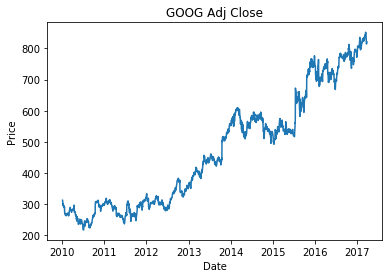

In [58]:
import matplotlib.pyplot as plt

column = 'Adj Close'

plt.plot(data[column])
plt.title(ticker + ' ' + column)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [64]:
data['Daily Return'] = data['Adj Close'].pct_change(1)

data.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Return,Momentum 5d,Momentum 10d
Date,,,,,,,,,
2010-01-04,626.951088,629.511067,624.241073,626.751061,3927000,313.062468,NaN,NaN,NaN
2010-01-05,627.181073,627.841071,621.541045,623.991055,6031900,311.683844,-0.004404,NaN,NaN
2010-01-06,625.861078,625.861078,606.361042,608.261023,7987100,303.826685,-0.025209,NaN,NaN
2010-01-07,609.401025,610.001045,592.651008,594.101005,12876600,296.753749,-0.023280,NaN,NaN
2010-01-08,592.000997,603.251034,589.110988,602.021036,9483900,300.709808,0.013331,NaN,NaN


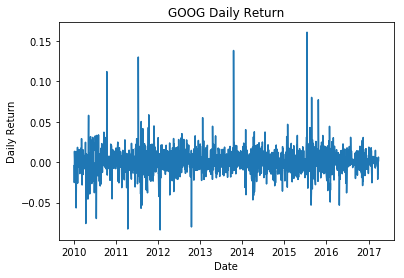

In [65]:
plt.plot(data['Daily Return'])
plt.title(ticker + ' Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [69]:
data_no_nan = data
data_no_nan['Daily Return']= data_no_nan['Daily Return'].shift(-1)
data_no_nan = data_no_nan.dropna()

data_no_nan.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Return,Momentum 5d,Momentum 10d
Date,,,,,,,,,
2010-01-19,581.201005,590.420997,576.290999,587.620986,8665700,293.516976,-0.012270,-0.022442,-0.062433
2010-01-20,585.981009,585.981009,575.290986,580.411005,6525700,289.915587,0.004428,-0.017054,-0.069841
2010-01-21,583.441002,586.821000,572.251003,582.980970,12662600,291.199286,-0.056554,-0.007001,-0.041561
2010-01-22,564.500980,570.600979,534.860888,550.010933,13651700,274.730736,-0.018200,-0.067543,-0.074213
2010-01-25,546.590929,549.880931,535.510900,540.000941,8872800,269.730740,0.004481,-0.068965,-0.103020


In [70]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, make_scorer

X = data_no_nan[['Volume', 'Adj Close']]
y = data_no_nan['Daily Return']

tscv = TimeSeriesSplit(n_splits=10)

linear = linear_model.LinearRegression(normalize=True)

print(cross_val_score(linear, X, y, cv=tscv))

print(cross_val_score(linear, X, y, cv=tscv).mean())

mse_scorer = make_scorer(mean_squared_error)

print(cross_val_score(linear, X, y, scoring=mse_scorer, cv=tscv))

print(cross_val_score(linear, X, y, scoring=mse_scorer, cv=tscv).mean()/y.mean())

[-0.12168874  0.00191742 -0.03018112 -0.14457984 -0.05394997 -0.00384797
 -0.00970138 -0.01400151 -0.00140953  0.00211539]
-0.0375327238839
[  2.74869171e-04   4.33291496e-04   2.06315565e-04   2.07672345e-04
   2.17243201e-04   1.97593701e-04   1.56314451e-04   4.41164149e-04
   1.96807571e-04   8.18961129e-05]
0.35083073565


In [71]:
data['Momentum 5d'] = data['Adj Close'].pct_change(5)
data['Momentum 10d'] = data['Adj Close'].pct_change(10)

data.tail()

,Open,High,Low,Close,Volume,Adj Close,Daily Return,Momentum 5d,Momentum 10d
Date,,,,,,,,,
2017-03-22,831.909973,835.549988,827.179993,829.590027,1392700,829.590027,-0.014477,-0.020786,-0.006919
2017-03-23,821.000000,822.570007,812.257019,817.580017,3483800,817.580017,-0.003853,-0.036759,-0.025159
2017-03-24,820.080017,821.929993,808.890015,814.429993,1970900,814.429993,0.006238,-0.044231,-0.034177
2017-03-27,806.950012,821.630005,803.369995,819.510010,1894300,819.510010,0.001721,-0.034052,-0.030785
2017-03-28,820.409973,825.989990,814.026978,820.919983,1618000,820.919983,NaN,-0.011488,-0.029209


In [81]:
data_no_nan = data
data_no_nan['Daily Return']= data_no_nan['Daily Return'].shift(-1)
data_no_nan = data_no_nan.dropna()

X = data_no_nan[['Volume', 'Adj Close', 'Momentum 5d', 'Momentum 10d']]
y = data_no_nan['Daily Return']

tscv = TimeSeriesSplit(n_splits=10)

linear = linear_model.LinearRegression(normalize=True)

print(cross_val_score(linear, X, y, cv=tscv))

print(cross_val_score(linear, X, y, cv=tscv).mean())

mse_scorer = make_scorer(mean_squared_error)

print(cross_val_score(linear, X, y, scoring=mse_scorer, cv=tscv))

print(cross_val_score(linear, X, y, scoring=mse_scorer, cv=tscv).mean()/y.mean())

[-0.11629    -0.00745591 -0.02699305 -0.21075821 -0.07940264 -0.00290149
 -0.0164823  -0.01495576  0.00375565  0.00731149]
-0.0464172215577
[  2.73546212e-04   4.37360683e-04   2.05677086e-04   2.19679735e-04
   2.22489578e-04   1.97407399e-04   1.57364222e-04   4.41579321e-04
   1.95792456e-04   8.14696706e-05]
0.351020128317


1806


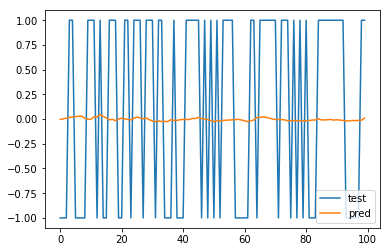

In [139]:
print(X.shape[0])

X_train = X[0:X.shape[0]-100]
X_test = X[X.shape[0]-100:X.shape[0]]

y_train = y[0:X.shape[0]-100]
y_test = y[X.shape[0]-100:X.shape[0]]

linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['test', 'pred'])
plt.show()

In [135]:
import numpy as np

data_no_nan = data
data_no_nan['Daily Return']= data_no_nan['Daily Return'].shift(-1)
data_no_nan = data_no_nan.dropna()

X = data_no_nan[['Volume', 'Adj Close', 'Momentum 5d', 'Momentum 10d']]
y = np.sign(data_no_nan['Daily Return'])

tscv = TimeSeriesSplit(n_splits=10)

linear = linear_model.LinearRegression(normalize=True)

print(cross_val_score(linear, X, y, cv=tscv))

print(cross_val_score(linear, X, y, cv=tscv).mean())

mse_scorer = make_scorer(mean_squared_error)

print(cross_val_score(linear, X, y, scoring=mse_scorer, cv=tscv))

print(cross_val_score(linear, X, y, scoring=mse_scorer, cv=tscv).mean()/y.mean())

[-0.0419075  -0.00047439  0.00551271 -0.00829576 -0.01657247 -0.00226281
  0.00034049 -0.01078804 -0.00313874 -0.00641715]
-0.00840036564944
[ 1.03431477  0.99511789  0.99212087  1.00589649  1.01657247  1.00211375
  0.99951084  1.01018673  1.00075174  0.99908305]
30.2675625358


1806


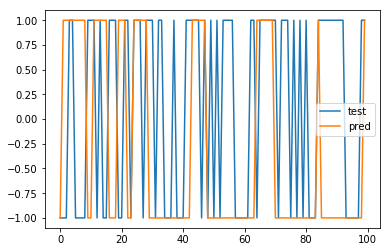

In [138]:
print(X.shape[0])

X_train = X[0:X.shape[0]-100]
X_test = X[X.shape[0]-100:X.shape[0]]

y_train = y[0:X.shape[0]-100]
y_test = y[X.shape[0]-100:X.shape[0]]

linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

plt.plot(y_test.values)
plt.plot(np.sign(y_pred))
plt.legend(['test', 'pred'])
plt.show()